# Project 2

I'm going to explore the relationship between anxiety disorder prevalence and a country's GDP per capita to understand how economic factors impact mental health across regions. Regions with higher GDP per capita often have better healthcare resources and lower financial stress, potentially reducing anxiety by increasing access to mental health support. Conversely, areas with lower GDP per capita may experience higher anxiety rates due to limited resources and economic insecurity. This analysis will help illustrate the role of economic stability in shaping mental well-being across different contexts.

### Data

Data source for anxiety disorder prevalence: https://www.kaggle.com/datasets/muhammadfaizan65/mental-health-depression-disorder-data

Data source for GDP per Capita: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

In [6]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [7]:
import pandas as pd
import plotly.express as px

In [8]:
anxiety = pd.read_csv(
    "disorderdata.csv",
    sep=';',
    on_bad_lines="skip"
)
anxiety.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [9]:
gdp_percapita= pd.read_csv(
    "gdp_percapita.csv"
)
gdp_percapita.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.342517,166.263682,171.961916,182.018479,192.639989,202.847824,...,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,122.193931,127.732834,134.130071,139.291222,148.821355,156.314136,...,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620


From now on I will only use "Anxiety Disorder (%)" column and will drop others

In [11]:
anxiety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     6468 non-null   object 
 1   Code                       5488 non-null   object 
 2   Year                       6468 non-null   int64  
 3   Schizophrenia (%)          6468 non-null   float64
 4   Bipolar disorder (%)       6468 non-null   float64
 5   Eating disorders (%)       6468 non-null   float64
 6   Anxiety disorders (%)      6468 non-null   float64
 7   Drug use disorders (%)     6468 non-null   float64
 8   Depression (%)             6468 non-null   float64
 9   Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 505.4+ KB


In [12]:
anxiety2 = anxiety[['Entity', 'Code','Year','Anxiety disorders (%)']]

In [13]:
anxiety2.head()

,Entity,Code,Year,Anxiety disorders (%)
0,Afghanistan,AFG,1990,4.828830
1,Afghanistan,AFG,1991,4.829740
2,Afghanistan,AFG,1992,4.831108
3,Afghanistan,AFG,1993,4.830864
4,Afghanistan,AFG,1994,4.829423


I will use only the most recent data available, which is from 2017

In [15]:
anxiety2_2017 = anxiety2[anxiety2['Year'] == 2017]

In [16]:
anxiety2_2017

,Entity,Code,Year,Anxiety disorders (%)
27,Afghanistan,AFG,2017,4.882481
55,Albania,ALB,2017,3.385245
83,Algeria,DZA,2017,5.065876
111,American Samoa,ASM,2017,3.315834
139,Andean Latin America,NaN,2017,4.267738
...,...,...,...,...
6355,Western Sub-Saharan Africa,NaN,2017,2.908183
6383,World,OWID_WRL,2017,3.764811
6411,Yemen,YEM,2017,4.857207
6439,Zambia,ZMB,2017,3.599714


We will drop the countries that do not have a valid code or contain NaN values, such as 'Andean Latin America

In [18]:
anxiety2017 = anxiety2_2017.dropna(subset=['Code'])
anxiety2017

,Entity,Code,Year,Anxiety disorders (%)
27,Afghanistan,AFG,2017,4.882481
55,Albania,ALB,2017,3.385245
83,Algeria,DZA,2017,5.065876
111,American Samoa,ASM,2017,3.315834
167,Andorra,AND,2017,5.305375
...,...,...,...,...
6271,Vietnam,VNM,2017,2.066871
6383,World,OWID_WRL,2017,3.764811
6411,Yemen,YEM,2017,4.857207
6439,Zambia,ZMB,2017,3.599714


In [19]:
gdp_2017 = gdp_percapita[['Country Code', 'Country Name', '2017']]
gdp_2017

,Country Code,Country Name,2017
0,ABW,Aruba,29329.081747
1,AFE,Africa Eastern and Southern,1485.753579
2,AFG,Afghanistan,526.140801
3,AFW,Africa Western and Central,1590.555785
4,AGO,Angola,2439.374439
...,...,...,...
261,XKX,Kosovo,4009.353811
262,YEM,Yemen Rep.,893.716501
263,ZAF,South Africa,6734.475153
264,ZMB,Zambia,1495.752138


It seems that the 'World' row has different codes in both datasets. Let's change it.

In [21]:
anxiety2017.loc[anxiety2017['Entity'] == 'World', 'Code'] = 'WLD'

In [22]:
anxiety2017

,Entity,Code,Year,Anxiety disorders (%)
27,Afghanistan,AFG,2017,4.882481
55,Albania,ALB,2017,3.385245
83,Algeria,DZA,2017,5.065876
111,American Samoa,ASM,2017,3.315834
167,Andorra,AND,2017,5.305375
...,...,...,...,...
6271,Vietnam,VNM,2017,2.066871
6383,World,WLD,2017,3.764811
6411,Yemen,YEM,2017,4.857207
6439,Zambia,ZMB,2017,3.599714


Now, let's merge both datasets using **Country Code** as **the composite key**.

In [24]:
merged_data = pd.merge(left=anxiety2017, right=gdp_2017, left_on="Code", right_on="Country Code")
merged_data

,Entity,Code,Year,Anxiety disorders (%),Country Code,Country Name,2017
0,Afghanistan,AFG,2017,4.882481,AFG,Afghanistan,526.140801
1,Albania,ALB,2017,3.385245,ALB,Albania,4531.032207
2,Algeria,DZA,2017,5.065876,DZA,Algeria,4615.868744
3,American Samoa,ASM,2017,3.315834,ASM,American Samoa,12372.884783
4,Andorra,AND,2017,5.305375,AND,Andorra,40632.231552
...,...,...,...,...,...,...,...
190,Vietnam,VNM,2017,2.066871,VNM,Viet Nam,2992.071532
191,World,WLD,2017,3.764811,WLD,World,10762.804585
192,Yemen,YEM,2017,4.857207,YEM,Yemen Rep.,893.716501
193,Zambia,ZMB,2017,3.599714,ZMB,Zambia,1495.752138


### Data Visualization

Let's compare our Anxiety Disorder Prevalence data with each country's GDP per capita for 2017.

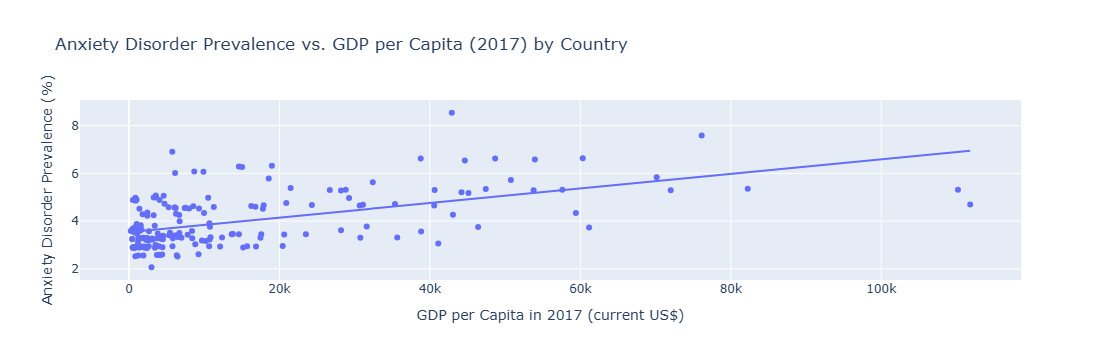

In [27]:
fig = px.scatter(
    merged_data,
    x="2017",
    y="Anxiety disorders (%)",
    title="Anxiety Disorder Prevalence vs. GDP per Capita (2017) by Country",
    trendline="ols",
 
)
fig.update_layout(
    xaxis_title="GDP per Capita in 2017 (current US$)",
    yaxis_title="Anxiety Disorder Prevalence (%)"
)


fig.show()

This scatterplot examines the relationship between a country's GDP per capita and the prevalence of anxiety disorders, aiming to understand the potential impact of economic stability on mental health. The weak positive trend suggests that as GDP per capita increases, anxiety disorder prevalence also tends to rise slightly, though not significantly. This finding challenges the assumption that higher economic wealth directly correlates with lower anxiety, despite the greater access to healthcare and reduced financial stress often associated with wealthier countries. Conversely, countries with lower GDP per capita show a relatively narrow range of anxiety prevalence, hinting that limited resources may not be the sole drivers of anxiety rates. Overall, the data underscores that while economic factors may play a role, mental health is likely influenced by a combination of social, cultural, and economic variables, revealing the complexity of the link between GDP and anxiety.

In [29]:
trend_results = px.get_trendline_results(fig).iloc[0, 0]
trend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     76.51
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.20e-15
Time:                        21:06:38   Log-Likelihood:                -262.84
No. Observations:                 191   AIC:                             529.7
Df Residuals:                     189   BIC:                             536.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5342      0.086     40.972      0.000       3.364       3.704
x1          3.054e-05   3.49e-06      8.747      0.000    2.37e-05    3.74e-05
==============================================================================
Omnibus:                       26.039   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.875
Skew:                           0.890   Prob(JB):                     7.26e-08
Kurtosis:                       3.981   Cond. No.                     3.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Key Points**:
1. R-squared (0.288): About 28.8% of the variance in anxiety disorder prevalence is explained by GDP per capita, suggesting a moderate fit.
2. Adjusted R-squared (0.284): Similar to R-squared, indicating the model’s explanatory power is consistent when adjusted for the number of predictors.
3. F-statistic (76.51) and Prob(F-statistic) (1.20e-15): The very low p-value for the F-statistic confirms that the overall model is statistically significant.

**Coefficients**:
1. Constant (3.5342): The intercept, when GDP per capita is zero, anxiety disorder prevalence is approximately 3.53%.
2. x1 (3.054e-05): The coefficient for GDP per capita is 3.054e-05, suggesting that for each one-unit increase in GDP per capita, the prevalence of anxiety disorders increases slightly (by 0.003%), though this increase is statistically significant (p-value = 0.000).

### Conclusion
The model indicates a small but statistically significant positive relationship between GDP per capita and anxiety disorder prevalence. However, the relatively low R-squared and high condition number suggest that this model has limitations and that other factors beyond GDP per capita likely influence anxiety rates. Additionally, the non-normality in residuals points to possible model specification issues, suggesting further refinement or additional variables might improve the model’s accuracy.